# Taller modelos de aprendizaje

Esta tarea consiste en que partiendo de los problemas del taller modelos de SVM, se debe implementar un modelo de aprendizaje de maquina que considere los espacios de hipótesis revisados en clase. El modelo debe garantizar:

1. Generalización por medio de una estrategia de adecuada de validación cruzada.
2. Ajuste de hiperparametros (con una selección adecuada de hiperparametros para cada modelo)


Para esto primero carguemos ambos datasets:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm

### Dataset 1: Banknote authentication

In [2]:
# Cargamos y organizamos el dataset 1
data_bank = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', header=None)
data_bank.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

# Remplazamos los 0 por -1 para la SVM
data_bank["class"] = data_bank["class"].replace([0],-1)

# Separamos los atributos de las etiquetas
# Atributos 
X_data_bank = data_bank[["variance", "skewness", "curtosis", "entropy"]]
#Etiquetas
y_data_bank = data_bank["class"]


X_data_bank.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [3]:
y_data_bank.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: class, dtype: int64

### Dataset 2: Occupancy detection

In [4]:
#En este caso como el archivo es un Zip hay que hacer un par adicional de pasos
import urllib
import zipfile

# Descargamos y descomprimos los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
extract_dir = "occupancy"

zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)

In [5]:

# Como los datos están separados de una vez para
# entrenar y hacer testing del modelo, es necesario 
# crear varios dataframes

def occupancy_df_process(path):
  data = pd.read_csv(path, sep=",", 
            names=["col","date","Temperature","Humidity",
                   "Light","CO2","HumidityRatio","Occupancy"])[1:]

  data = data.drop(["col"],axis=1)
  #ya no usamos date, pero pues el código está lindo 
  data['date'] = data['date'].apply(lambda x: pd.to_datetime(x).to_julian_date())
  data["Light"] = data["Light"].astype(float)
  data["Temperature"] = data["Temperature"].astype(float)
  data["Humidity"] = data["Humidity"].astype(float)
  data["CO2"] = data["CO2"].astype(float)
  data["HumidityRatio"] = data["HumidityRatio"].astype(float)
  data["Occupancy"] = data["Occupancy"].astype(float)


  # Remplazamos los 0 por -1 para la SVM
  data["Occupancy"] = data["Occupancy"].replace([0],-1)

  # Etiquetas
  X_data = data[["Temperature","Humidity",
                   "Light","CO2","HumidityRatio"]]
  # Atributos
  Y_data = data["Occupancy"]
  return X_data, Y_data

occupancy_train_X , occupancy_train_y = occupancy_df_process("occupancy/datatraining.txt")
occupancy_test_X , occupancy_test_y = occupancy_df_process("occupancy/datatest.txt")
occupancy_test2_X , occupancy_test2_y = occupancy_df_process("occupancy/datatest2.txt")

#Creamos un dataframe unico
occupancy_X = pd.concat([occupancy_train_X,occupancy_test_X, occupancy_test2_X])
occupancy_Y = pd.concat([occupancy_train_y, occupancy_test_y, occupancy_test2_y])

In [6]:
occupancy_train_X.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object

In [7]:
print(occupancy_train_y)

1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
8139    1.0
8140    1.0
8141    1.0
8142    1.0
8143    1.0
Name: Occupancy, Length: 8143, dtype: float64


Ahora luego de cargarlos vamos a probar con diferentes modelos de clasificación, usando validación cruzada para poder hacer un buen ajuste de hiperparámetros:

## Perceptron

Para Perceptrón el hiperparámetro que se va a buscar es cual regularización se debe aplicar para garantizar el mejor rendimiento del modelo:

#### Banknote authentication

In [8]:
# Busqueda del mejor penalty para perceptron

pent = ["l1","l2","elasticnet"]
k_scores = []
for k in pent:    
   perc = Perceptron(tol=1e-3, random_state=0, penalty=k)   
   scores = cross_val_score(perc, X_data_bank, y_data_bank, cv=50)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9818518518518518, 0.9832539682539683, 0.9783068783068782]


Text(0, 0.5, 'Precisión de Cross-Validation')

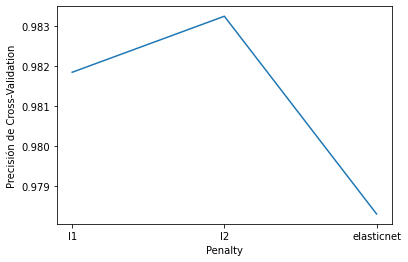

In [9]:
%matplotlib inline

# Plot del valor de k para Knn con su accuracy respectiva
plt.plot(pent, k_scores)
plt.xlabel('Penalty')
plt.ylabel('Precisión de Cross-Validation')

#### Occupancy detection

In [10]:
# Busqueda del mejor penalty para perceptron

pent = ["l1","l2","elasticnet"]
k_scores = []
for k in pent:    
   perc = Perceptron(tol=1e-3, random_state=0, penalty=k)   
   scores = cross_val_score(perc, occupancy_X, occupancy_Y, cv=50)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9799240545201142, 0.9268510381971511, 0.9285539649918502]


Text(0, 0.5, 'Precisión de Cross-Validation')

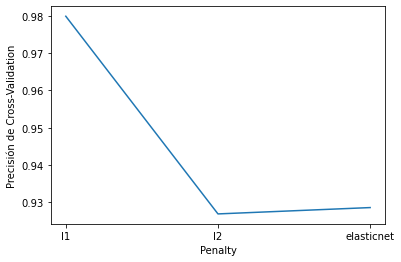

In [11]:
%matplotlib inline

# Plot del valor de k para Knn con su accuracy respectiva
plt.plot(pent, k_scores)
plt.xlabel('Penalty')
plt.ylabel('Precisión de Cross-Validation')

## SVM

Para Support Vector Machines los hiperparámetros que se van a ajustar son el kernel escogido para el modelo y el parámetro de regularización

#### Banknote authentication


In [12]:
# Busqueda del mejor kernel para SVM


kern = ["linear","poly","rbf"]
k_scores = []
for k in kern:    
   svmm = svm.SVC(kernel=k, C=1, random_state=42)
   scores = cross_val_score(svmm, X_data_bank, y_data_bank, cv=10)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9876071088543318, 0.9693800909764096, 0.9963503649635037]


Text(0, 0.5, 'Precisión de Cross-Validation')

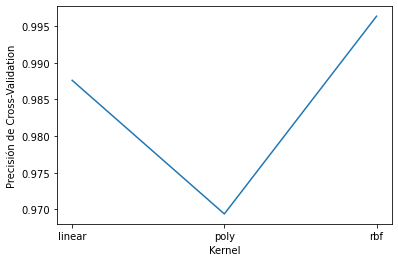

In [13]:
%matplotlib inline

# Plot de los kernel para svm con su accuracy respectiva
plt.plot(kern, k_scores)
plt.xlabel('Kernel')
plt.ylabel('Precisión de Cross-Validation')

El kernel que mejor se ajusta es el rbf ( Radial basis function ).

In [14]:
# Busqueda del parámetro de regularización para SVM

Ccs = list(range(1, 10))
k_scores = []
for k in Ccs:    
   svmm = svm.SVC(kernel="rbf", C=k, random_state=42)
   scores = cross_val_score(svmm, X_data_bank, y_data_bank, cv=10)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9963503649635037, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Precisión de Cross-Validation')

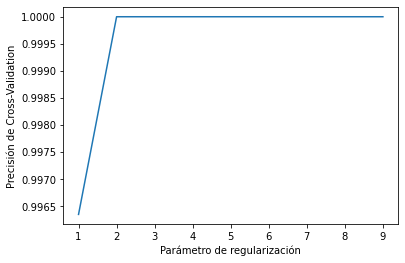

In [15]:
%matplotlib inline

# Plot de los kernel para svm con su accuracy respectiva
plt.plot(Ccs, k_scores)
plt.xlabel('Parámetro de regularización')
plt.ylabel('Precisión de Cross-Validation')

#### Occupancy detection

In [16]:
kern = ["linear","poly","rbf"]
k_scores = []
for k in kern:    
   svmm = svm.SVC(kernel=k, C=1, random_state=42)
   scores = cross_val_score(svmm, occupancy_X, occupancy_Y, cv=5)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9888132295719844, 0.9882295719844357, 0.9850194552529183]


Text(0, 0.5, 'Precisión de Cross-Validation')

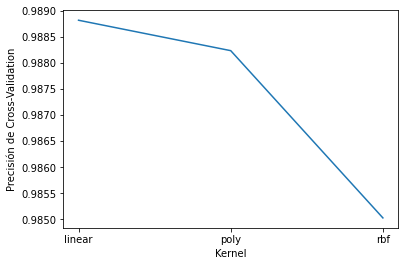

In [17]:
%matplotlib inline

# Plot de los kernel para svm con su accuracy respectiva
plt.plot(kern, k_scores)
plt.xlabel('Kernel')
plt.ylabel('Precisión de Cross-Validation')

El kernel que mejor se ajusta es el linear.

In [18]:
# Busqueda del parámetro de regularización para SVM

Ccs = list(range(1, 10))
k_scores = []
for k in Ccs:    
   svmm = svm.SVC(kernel="rbf", C=k, random_state=42)
   scores = cross_val_score(svmm, occupancy_X, occupancy_Y, cv=5)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9850194552529183, 0.9855058365758754, 0.985603112840467, 0.9857490272373541, 0.9860408560311285, 0.9861867704280156, 0.9862354085603112, 0.9864299610894942, 0.9862354085603112]


Text(0, 0.5, 'Precisión de Cross-Validation')

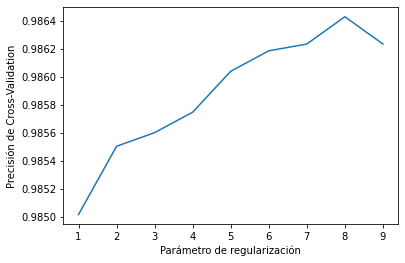

In [19]:
%matplotlib inline

# Plot de los kernel para svm con su accuracy respectiva
plt.plot(Ccs, k_scores)
plt.xlabel('Parámetro de regularización')
plt.ylabel('Precisión de Cross-Validation')

## Regresión logística

Para Regresión logística el los hiperparámetros que se van a ajustar son el término de regularización c.

#### Banknote authentication

In [20]:
# Busqueda del mejor poder de regularización c para regresión logística

Ccs = list(range(1, 10))
k_scores = []
for k in Ccs:    
   logi = LogisticRegression(tol=1e-3, random_state=0, penalty="l2", C=k)   
   scores = cross_val_score(logi, X_data_bank, y_data_bank, cv=50)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9898412698412699, 0.9891269841269841, 0.9876719576719577, 0.9876719576719577, 0.9876719576719577, 0.9876719576719577, 0.9876719576719577, 0.9876719576719577, 0.9876719576719577]


Text(0, 0.5, 'Precisión de Cross-Validation')

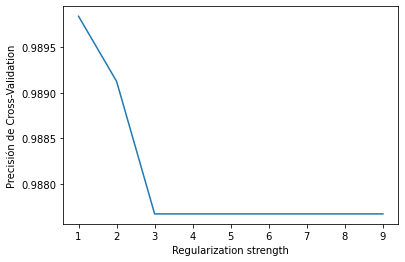

In [21]:
%matplotlib inline

# Plot del valor de k para Knn con su accuracy respectiva
plt.plot(Ccs, k_scores)
plt.xlabel('Regularization strength')
plt.ylabel('Precisión de Cross-Validation')

#### Occupancy detection

In [22]:
# Busqueda del mejor poder de regularización c para regresión logística

Ccs = list(range(1, 10))
k_scores = []
for k in Ccs:    
   logi = LogisticRegression(tol=1e-3, random_state=0, penalty="l2", C=k)   
   scores = cross_val_score(logi, occupancy_X, occupancy_Y, cv=50)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9889157394940118, 0.9889157394940118, 0.9888670776935251, 0.9888184158930384, 0.9888184158930384, 0.9888184158930384, 0.9888184158930384, 0.9888184158930384, 0.9888184158930384]


Text(0, 0.5, 'Precisión de Cross-Validation')

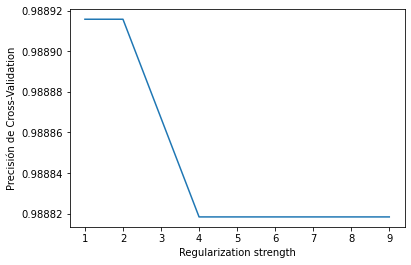

In [23]:
%matplotlib inline

# Plot del valor de k para Knn con su accuracy respectiva
plt.plot(Ccs, k_scores)
plt.xlabel('Regularization strength')
plt.ylabel('Precisión de Cross-Validation')

## KNN

Para KNN los hiperparámetros que vamos a ajustar son la cantidad de vecinos que vamos a usar en el modelo

#### Banknote authentication

In [24]:
# Busqueda del mejor k para knn (cantidad de vecinos)

k_range = list(range(1, 25))
k_scores = []
for k in k_range:    
   knn = KNeighborsClassifier(k)    
   scores = cross_val_score(knn, X_data_bank, y_data_bank, cv=10)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9992700729927007, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.997080291970803, 0.997080291970803, 0.9956204379562044, 0.9956204379562044, 0.9934306569343064, 0.9934306569343064, 0.9927007299270072, 0.9927007299270072]


Text(0, 0.5, 'Precisión de Cross-Validation')

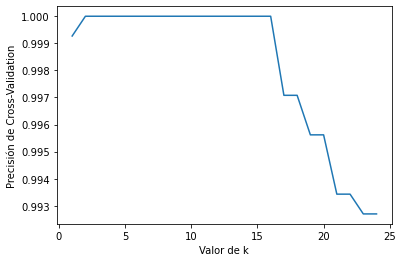

In [25]:

%matplotlib inline

# Plot del valor de k para Knn con su accuracy respectiva
plt.plot(k_range, k_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión de Cross-Validation')

#### Occupancy detection

In [26]:
# Busqueda del mejor k para knn (cantidad de vecinos)

k_range = list(range(1, 56))
k_scores = []
for k in k_range:    
   knn = KNeighborsClassifier(k)    
   scores = cross_val_score(knn, occupancy_X, occupancy_Y, cv=10)
   k_scores.append(scores.mean())
print(k_scores)
# Output k_scores

[0.9562743190661479, 0.959533073929961, 0.9650778210116732, 0.9668774319066147, 0.9740272373540856, 0.9744163424124513, 0.9784046692607002, 0.9782101167315174, 0.9793774319066149, 0.9803015564202335, 0.9808852140077822, 0.9816147859922179, 0.9827821011673151, 0.9832684824902724, 0.9836575875486382, 0.9835116731517509, 0.9841926070038911, 0.9841926070038912, 0.9839980544747082, 0.9841439688715955, 0.9842412451361868, 0.9842412451361868, 0.9844357976653697, 0.9845330739299613, 0.9845330739299613, 0.9845330739299613, 0.9840953307392997, 0.9840953307392997, 0.9838521400778211, 0.9839494163424124, 0.9838035019455253, 0.9838521400778211, 0.9836089494163425, 0.9838521400778211, 0.983511673151751, 0.9835603112840466, 0.9833171206225682, 0.9833171206225682, 0.9832684824902724, 0.9833171206225682, 0.9830739299610893, 0.9831225680933852, 0.9829280155642024, 0.9829766536964982, 0.9828793774319067, 0.9829766536964979, 0.9825389105058366, 0.9827821011673151, 0.9823929961089494, 0.9823929961089494, 0

Text(0, 0.5, 'Precisión de Cross-Validation')

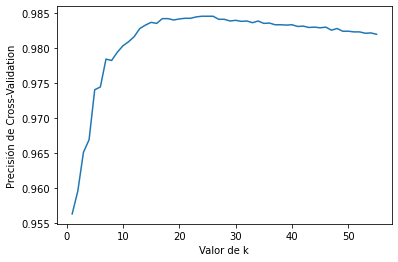

In [27]:
%matplotlib inline

# Plot del valor de k para Knn con su accuracy respectiva
plt.plot(k_range, k_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión de Cross-Validation')

---

**Navegacion entre los Notebooks:**

Regresar a [Introducción de la tarea de modelos](Introducción_Tarea_Modelos.ipynb)<br>

---

**Autores:** Alejandro Martin Salcedo.